<a href="https://colab.research.google.com/github/fmakkawi/Data110/blob/main/arah_week6_data110_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn matplotlib pandas joypy


In [2]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot


In [3]:
# Load the Palmer Penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Display the first few rows to get an overview of the dataset
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Drop rows with missing values
penguins_clean = penguins.dropna()

# Check if the missing values are removed
penguins_clean.isna().sum()


,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


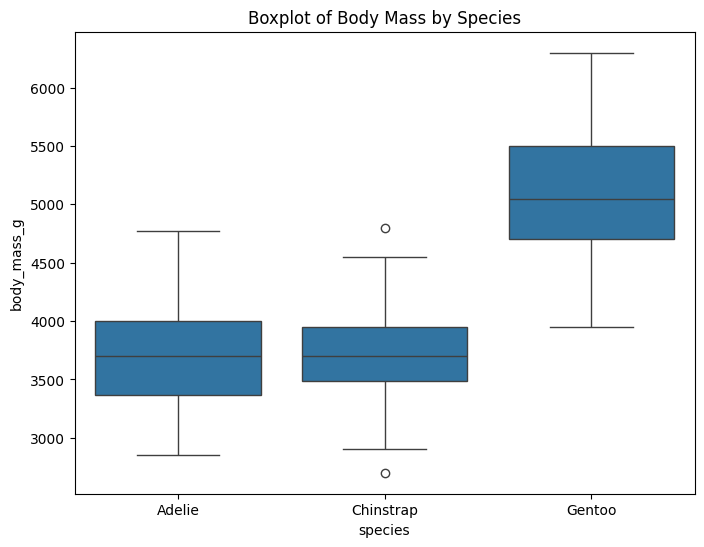

In [5]:
# Boxplot for Body Mass by Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='body_mass_g', data=penguins_clean)
plt.title('Boxplot of Body Mass by Species')
plt.show()


### Interpretation of Body Mass by Species

#### 1. **Which species has the largest median body mass?**
- Based on the boxplot, **Gentoo penguins** have the largest median body mass. The median line within the box for Gentoo penguins is the highest among the three species, indicating they generally have a higher body mass compared to the others.

#### 2. **Which species has the widest range in body mass?**
- The species with the widest range in body mass is **Chinstrap penguins**. The length of the whiskers (representing the range) for Chinstrap penguins is noticeably longer than the other species, showing a larger variability in body mass.

#### 3. **Are there any outliers? If so, which species have them?**
- Yes, there are outliers present in the dataset. **Adelie** and **Chinstrap** penguins both have outliers. These outliers are the points that are plotted individually outside the whiskers of the box. For example, there are some very low body mass values for both species that are far from the main distribution of data.


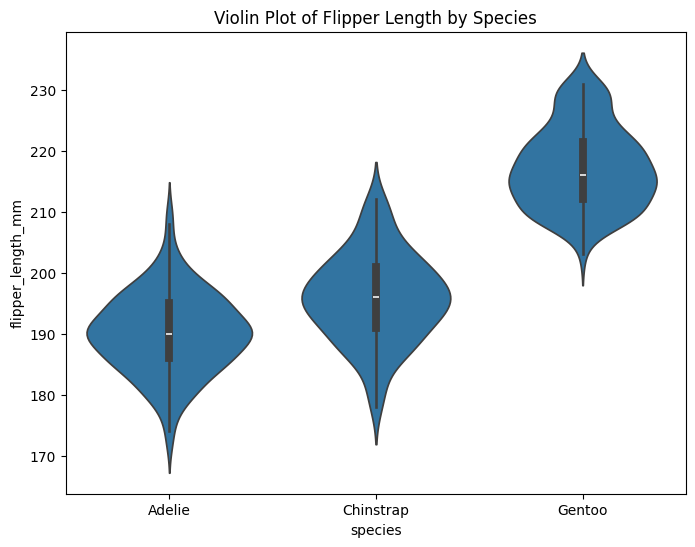

In [6]:
# Violin plot for Flipper Length by Species
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_clean)
plt.title('Violin Plot of Flipper Length by Species')
plt.show()


### Interpretation of Flipper Length by Species

#### 1. **Which species has the most symmetrical distribution?**
- Based on the violin plot, **Adelie penguins** appear to have the most symmetrical distribution. The shape of the violin plot for Adelie is evenly distributed around the median line (the white line), suggesting that their flipper lengths are relatively evenly spread.

#### 2. **Which species has the widest spread of flipper lengths?**
- **Gentoo penguins** have the widest spread of flipper lengths. The violin plot for Gentoo shows the widest width, indicating that the flipper lengths of Gentoo penguins vary more compared to the other species.

#### 3. **How do the quartiles (white lines in the plot) compare for each species?**
- The quartiles, represented by the white lines in the violin plot, show the distribution of the middle 50% of the data:
  - For **Adelie penguins**, the quartiles are relatively close together, suggesting less variability in flipper length.
  - For **Chinstrap penguins**, the quartiles are spread out more, showing greater variability in flipper lengths.
  - For **Gentoo penguins**, the quartiles are spread out the most, indicating the greatest variation in their flipper lengths.


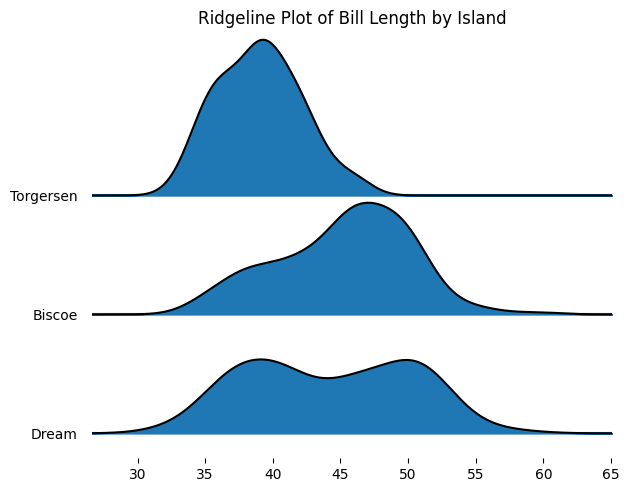

In [8]:
# Prepare data for ridgeline plot
data = [penguins_clean[penguins_clean['island'] == island]['bill_length_mm'].dropna() for island in penguins_clean['island'].unique()]
labels = list(penguins_clean['island'].unique())
# Ridgeline plot for Bill Length by Island
joyplot(data=data, labels=labels)
plt.title('Ridgeline Plot of Bill Length by Island')
plt.show()


### Interpretation of Bill Length by Island

#### 1. **Which island has the smallest range of bill lengths?**
- Based on the ridgeline plot, **Dream Island** seems to have the smallest range of bill lengths. The width of the ridgeline plot for Dream Island is narrower compared to the other islands, suggesting that the bill lengths for penguins on Dream Island are more consistent and have a smaller spread.

#### 2. **Which island has the most uniform distribution?**
- **Torgersen Island** appears to have the most uniform distribution of bill lengths. The ridgeline for Torgersen Island shows a smooth, continuous shape, which indicates that the data is spread out evenly with no significant peaks or gaps.

#### 3. **What differences do you notice between the islands in terms of bill length?**
- **Dream Island** has a relatively narrow range of bill lengths, indicating that penguins on this island have more similar bill lengths compared to those on other islands.
- **Torgersen Island** shows a more uniform distribution, suggesting that the penguins on this island have more consistent bill lengths.
- **Biscoe Island** shows a wider range of bill lengths, with some peaks indicating that there are more distinct groups of penguins with different bill lengths.
